# Bundesliga Analyse

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

## Daten Importieren

In [2]:
conn=mysql.connector.connect(host='localhost',port=int(3306),user='root',passwd='Roger123',db='fussballdata')

df=pd.read_sql_query("SELECT * FROM bundesliga ",conn)

df.head()

/var/folders/g8/k9tj64ws6m96zc6c40s8xc6m0000gn/T/ipykernel_11914/3879822241.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query("SELECT * FROM bundesliga ",conn)


,Liga,Saison,Spieltag,Heimteam,Gastteam,Endstand,Tore,Torzeit,Nachspielzeit
0,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,2:1,52,no
1,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,2:0,47,no
2,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,1:0,38,no
3,Bundesliga,2014/2015,1,1899 Hoffenheim,FC Augsburg,2:0,2:0,35,no
4,Bundesliga,2014/2015,1,1899 Hoffenheim,FC Augsburg,2:0,1:0,33,no


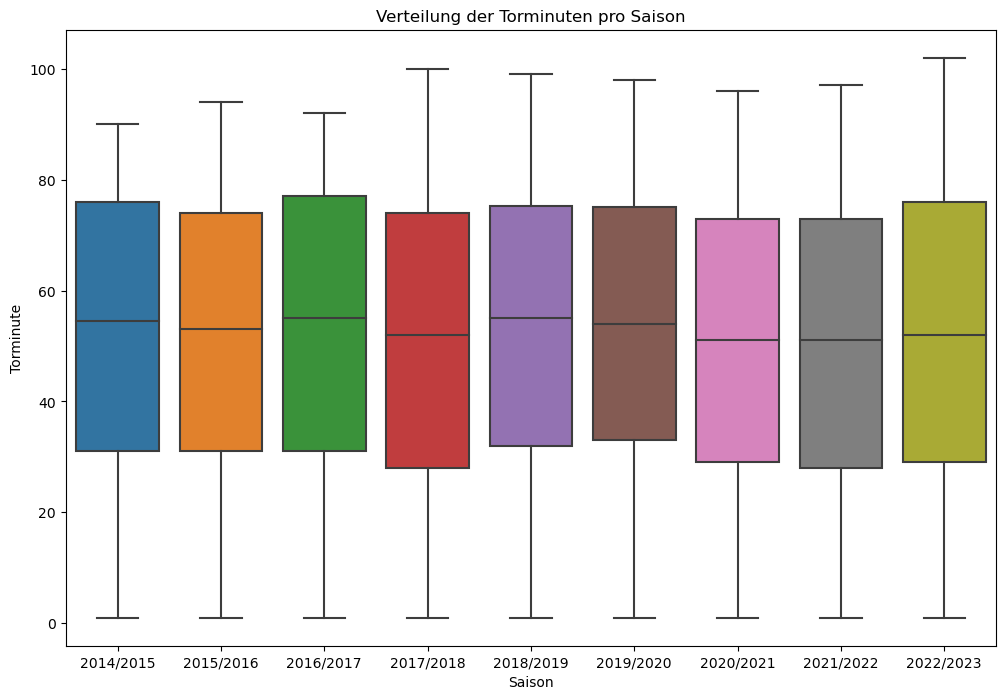

In [5]:
# Erstellen der Boxplots für jede Saison
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Saison', y='Torzeit')
plt.title('Verteilung der Torminuten pro Saison')
plt.xlabel('Saison')
plt.ylabel('Torminute')
plt.show()


([<matplotlib.axis.XTick at 0x14e00e110>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96'),
  Text(101, 0, '101')])

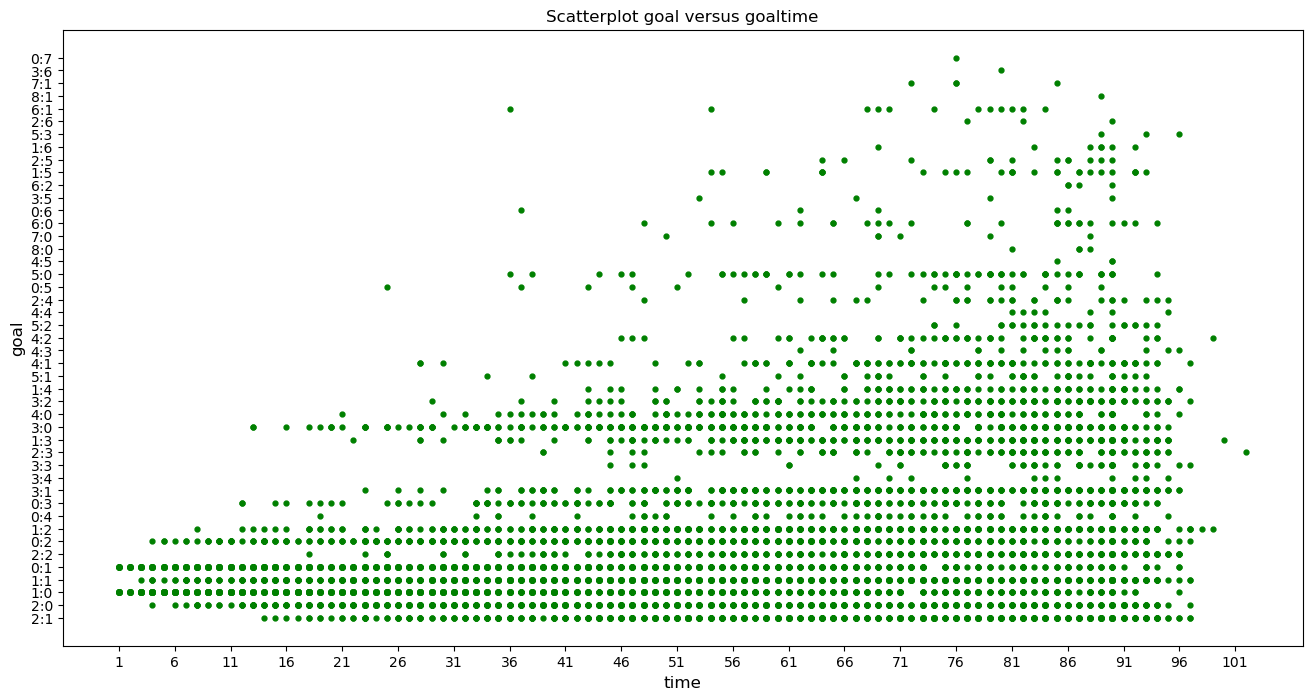

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df['Torzeit'], 
         df['Tore'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot goal versus goaltime', fontsize=12)
plt.ylabel('goal', fontsize=12)
plt.xlabel('time', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(range(1,102,5))